### Score: 49.5

Q1.[16.5+20+4]

Bonus.[9]

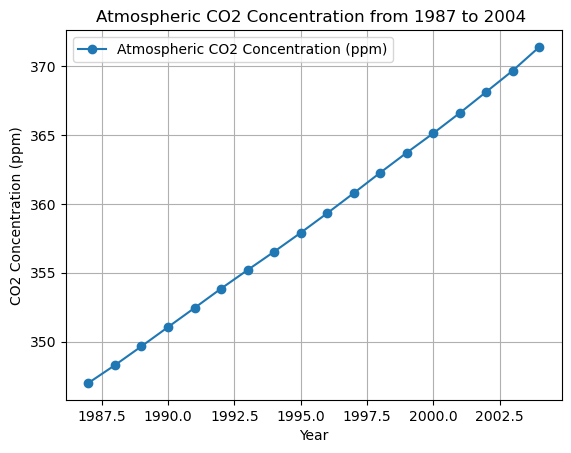

In [114]:
import numpy as np
import matplotlib.pyplot as plt
 
k12 = 105 / 740  # 从大气到海洋的转移系数
k21 = 102 / 900  # 从海洋到大气的转移系数
# 初始条件
N1_0 = 740  # 1987年的大气碳浓度（单位：PgC）
N2_0 = 900  # 1987年的海洋表面碳浓度（单位：PgC）
# 化石燃料燃烧产生的CO2速率（1987-2004年间的具体值）
emissions = np.array([5.755, 5.968, 6.088, 6.151, 6.239, 6.178, 6.172, 6.284, 6.422, 6.550, 6.663, 6.638, 6.584, 6.750, 6.916, 6.981, 7.397, 7.782])  # 单位：PgC/yr

years = np.arange(1987, 2005)
dt = 1  
 
# 初始化变量
N1 = np.zeros(len(years))  # 存储每年的大气碳浓度
N1[0] = N1_0  
N2 = np.zeros(len(years))  # 存储每年的海洋表面碳浓度
N2[0] = N2_0  
 
for i in range(1, len(years)):
    y_emission = emissions[i-1]  # 获取当前年份的人为排放量
    dN1_dt = -k12 * N1[i-1] + k21 * N2[i-1] + y_emission  # 计算大气碳浓度的变化率
    dN2_dt = k12 * N1[i-1] - k21 * N2[i-1]  # 计算海洋表面碳浓度的变化率
    N1[i] = N1[i-1] + dN1_dt * dt  # 更新大气碳浓度
    N2[i] = N2[i-1] + dN2_dt * dt  # 更新海洋表面碳浓度
 
# 将碳浓度转换为百万分比浓度（ppm）
ppm_conversion_factor = 740 / 347  # PgC/ppm
CO2_ppm = N1 / ppm_conversion_factor

plt.plot(years, CO2_ppm, label='Atmospheric CO2 Concentration (ppm)', marker='o') 
plt.xlabel('Year')
plt.ylabel('CO2 Concentration (ppm)')
plt.title('Atmospheric CO2 Concentration from 1987 to 2004 ')
plt.legend()
plt.grid(True)
plt.show()

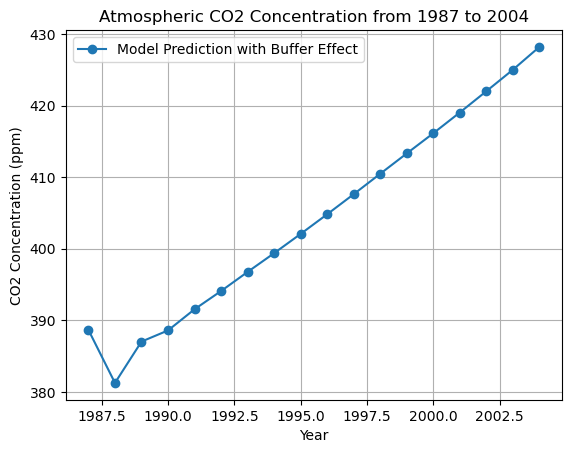

In [15]:
import numpy as np
import matplotlib.pyplot as plt
 
k12 = 105 / 740  # 从大气到海洋的转移系数
k21 = 102 / 900  # 从海洋到大气的转移系数
# 初始条件
N1_0 = 740  # 初始大气中的碳含量（单位：PgC）
N2_0 = 900  # 初始海洋表面的碳含量（单位：PgC）
N2__0 = 821 # 前工业化时代，海洋表层碳的平衡值（单位：PgC）
# 化石燃料燃烧产生的CO2速率（1986-2004年间的具体值）
emissions = np.array([5.609, 5.755, 5.968, 6.088, 6.151, 6.239, 6.178, 6.172, 6.284, 6.422, 6.550, 6.663, 6.638, 6.584, 6.750, 6.916, 6.981, 7.397, 7.782])  # 单位：PgC/yr
# 缓冲因子参数
a, b, c = 3.69, 1.86e-2, -1.80e-6
 
years = np.arange(1986, 2005)  # 完整的年份数组，包括1986年
dt = 1  
 
# 初始化变量
N1 = np.zeros(len(years))  # 大气中的碳含量（单位：PgC）
N1[0] = N1_0 + emissions[0]  # 加上1986年的排放量
N2 = np.zeros(len(years))  # 海洋表面的碳含量（单位：PgC）
N2[0] = N2_0
CO2_ppm = np.zeros(len(years))  # 大气中的二氧化碳浓度（单位：ppm）
CO2_ppm[0] = (N1_0 + emissions[0]) / 2.13  # 加上1986年的排放量后转换为ppm
 
# 缓冲因子的计算函数
def buffer_factor(P):
    z = P / 2.13  # 将PgC转换为ppm来计算缓冲因子
    return a + b * z + c * z**2
 
for t in range(1, len(years)):
    # 计算缓冲因子
    gamma = buffer_factor(N1[t-1])  
    
    # 使用方程式进行计算
    dN1 = -k12 * N1[t-1] + k21 * (N2__0 + gamma * (N2[t-1] - N2__0)) + emissions[t-1] 
    dN2 = k12 * N1[t-1] - k21 * (N2__0 + gamma * (N2[t-1] - N2__0))
 
    N1[t] = N1[t-1] + dN1 * dt
    N2[t] = N2[t-1] + dN2 * dt
    
    CO2_ppm[t] = N1[t] / 2.13
 

years_to_plot = years[1:] 
CO2_ppm_to_plot = CO2_ppm[1:]  # 去掉1986年的CO2浓度
plt.plot(years_to_plot, CO2_ppm_to_plot, label='Model Prediction with Buffer Effect', marker='o')
plt.xlabel('Year')
plt.ylabel('CO2 Concentration (ppm)')
plt.title('Atmospheric CO2 Concentration from 1987 to 2004')
plt.legend()
plt.grid(True)
plt.show()


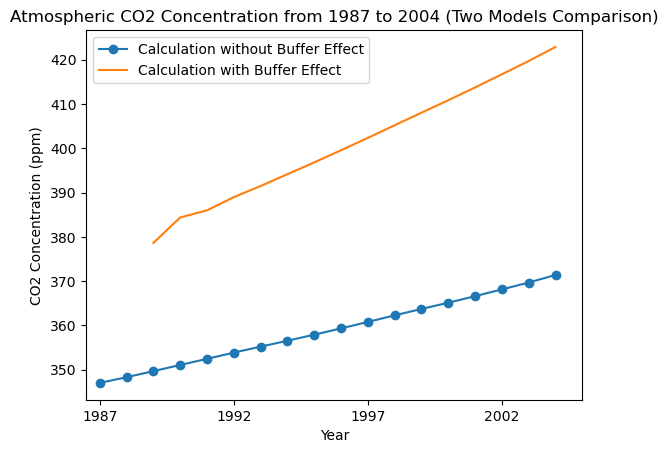

In [136]:
import numpy as np
import matplotlib.pyplot as plt
 
# 定义第一个模型的参数（无缓冲效应）
k12_no_buffer = 105 / 740 
k21_no_buffer = 102 / 900 
N1_0_no_buffer = 740 
N2_0_no_buffer = 900 
emissions_no_buffer = np.array([5.755, 5.968, 6.088, 6.151, 6.239, 6.178, 6.172, 6.284, 6.422, 6.550, 6.663, 6.638, 6.584, 6.750, 6.916, 6.981, 7.397, 7.782])  # 单位：PgC/yr
# 定义第二个模型的参数（有缓冲效应）
k12_buffer = 105 / 740  
k21_buffer = 102 / 900  
N1_0_buffer = 740 
N2_0_buffer = 900  
N2__0_buffer = 821 
a, b, c = 3.69, 1.86e-2, -1.80e-6  
fossil_fuel_emission_rates_buffer = np.array([5.755, 5.968, 6.088, 6.151, 6.239, 6.178, 6.172, 6.284, 6.422, 6.550, 6.663, 6.638, 6.584, 6.750, 6.916, 6.981, 7.397, 7.782])  # 单位：PgC/yr
 
# 时间范围
years = np.arange(1987, 2005)
dt = 1  # 时间步长（年）
 
# 初始化变量（无缓冲效应）
N1_no_buffer = np.zeros(len(years))
N1_no_buffer[0] = N1_0_no_buffer
N2_no_buffer = np.zeros(len(years))
N2_no_buffer[0] = N2_0_no_buffer
 
# 初始化变量（有缓冲效应）
N1_buffer = np.zeros(len(years))
N1_buffer[0] = N1_0_buffer
N2_buffer = np.zeros(len(years))
N2_buffer[0] = N2_0_buffer
 
# 无缓冲效应的模型计算
for i in range(1, len(years)):
    y_emission = emissions_no_buffer[i-1]
    dN1_dt = -k12_no_buffer * N1_no_buffer[i-1] + k21_no_buffer * N2_no_buffer[i-1] + y_emission
    dN2_dt = k12_no_buffer * N1_no_buffer[i-1] - k21_no_buffer * N2_no_buffer[i-1]
    N1_no_buffer[i] = N1_no_buffer[i-1] + dN1_dt * dt
    N2_no_buffer[i] = N2_no_buffer[i-1] + dN2_dt * dt

ppm_conversion_factor = 740 / 347  # PgC/ppm
CO2_ppm_no_buffer = N1_no_buffer / ppm_conversion_factor
 
# 有缓冲效应的模型计算
def buffer_factor(P):
    z = P / 2.13  
    return a + b * z + c * z**2
 
for t in range(1, len(years)):
    gamma = buffer_factor(N1_buffer[t-1])
    dN1 = -k12_buffer * N1_buffer[t-1] + k21_buffer * (N2__0_buffer + gamma * (N2_buffer[t-1] - N2__0_buffer)) + fossil_fuel_emission_rates_buffer[t-1]
    dN2 = k12_buffer * N1_buffer[t-1] - k21_buffer * (N2__0_buffer + gamma * (N2_buffer[t-1] - N2__0_buffer))
    N1_buffer[t] = N1_buffer[t-1] + dN1 * dt
    N2_buffer[t] = N2_buffer[t-1] + dN2 * dt
 
ppm_conversion_factor_buffer = 2.13  
CO2_ppm_buffer = N1_buffer / ppm_conversion_factor  
 
plt.plot(years, CO2_ppm_no_buffer, label='Calculation without Buffer Effect', marker='o')
start_year_buffer = np.where(years == 1989)[0][0]
years_buffer = years[start_year_buffer:]
CO2_ppm_buffer_slice = CO2_ppm_buffer[start_year_buffer:]
plt.plot(years_buffer, CO2_ppm_buffer_slice, label='Calculation with Buffer Effect')
plt.xlabel('Year')
plt.ylabel('CO2 Concentration (ppm)')
plt.title('Atmospheric CO2 Concentration from 1987 to 2004 (Two Models Comparison)')
plt.legend()
plt.xticks(np.arange(1987, 2006, 5))
plt.xlim(years[0] - 0.5, years[-1] + 1)
# NOTE: 缺少观测数据的散点图 -1
plt.show()

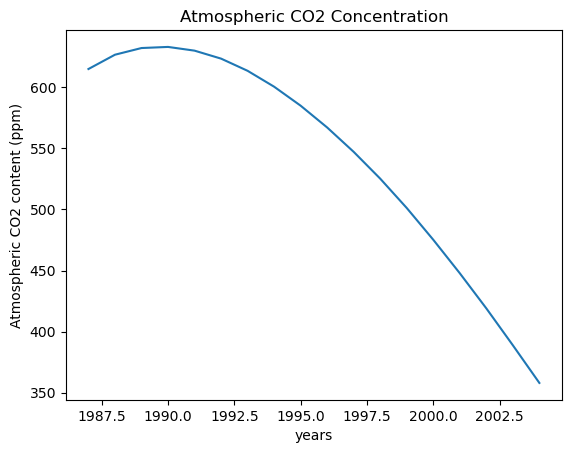

In [139]:
import numpy as np
import matplotlib.pyplot as plt
 
# 定义参数
N1_0 = 615  # 大气中的碳含量（单位：PgC）
N2_0 = 842  # 表层海洋中的碳含量（单位：PgC）
N3_0 = 9744  # 中间海洋中的碳含量（单位：PgC）
N4_0 = 26280  # 深海中的碳含量（单位：PgC）
N5_0 = 90000000  # 沉积物中的碳含量（单位：PgC）
N6_0 = 731  # 生物圈中的碳含量（单位：PgC）
N7_0 = 1328  # 土壤中的碳含量（单位：PgC）
 
k12 = 60 / 615
k21 = 60 / 842
k23 = 9 / 842
k24 = 43 / 842
k32 = 52 / 9744
k34 = 162 / 9744
k43 = 205 / 26280
k45 = 0.2 / 26280
k51 = 0.2 / 90000000
k67 = 62 / 731
k71 = 62 / 1328
f0 = 62  
 
a, b, c = 3.69, 1.86e-2, -1.80e-6

years = np.arange(1987, 2005)
dt = 1  
time_steps = len(years)
 
# 初始化变量
N1 = np.zeros(time_steps) 
N2 = np.zeros(time_steps) 
N3 = np.zeros(time_steps)
N4 = np.zeros(time_steps)
N5 = np.zeros(time_steps)
N6 = np.zeros(time_steps)
N7 = np.zeros(time_steps)
CO2_ppm = np.zeros(time_steps)  
 
# 设置初始值
N1[0] = N1_0
N2[0] = N2_0
N3[0] = N3_0
N4[0] = N4_0
N5[0] = N5_0
N6[0] = N6_0
N7[0] = N7_0
CO2_ppm[0] = N1_0 / 2.13  # 将PgC转换为ppm
 
# 化石燃料燃烧产生的CO2速率（1987-2004年间的具体值）
R = np.array([5.755, 5.968, 6.088, 6.151, 6.239, 6.178, 6.172, 6.284, 6.422, 6.550, 6.663, 6.638, 6.584, 6.750, 6.916, 6.981, 7.397, 7.782])  # 单位：PgC/yr
# 找不到land use排放数据，将他和化石燃料等同先计算
# NOTE: 这样计算的结果是有误的 -1
E = np.array([5.755, 5.968, 6.088, 6.151, 6.239, 6.178, 6.172, 6.284, 6.422, 6.550, 6.663, 6.638, 6.584, 6.750, 6.916, 6.981, 7.397, 7.782])  # 单位：PgC/yr
 
def buffer_factor(P):
    z = P / 2.13  # 将PgC转换为ppm来计算缓冲因子
    return a + b * z + c * z**2
 
for t in range(1, time_steps):
    gamma = buffer_factor(N1[t-1])
    dN1 = k21 * (N2_0 + gamma * (N2[t-1] - N2_0)) - k12 * N1[t-1] + R[t-1] - f0 + E[t-1] + k71 * N7[t-1] + k51 * N5[t-1]
    dN2 = k12 * N1[t-1] - k21 * (N2_0 + gamma * (N2[t-1] - N2_0)) + k32 * N3[t-1] - k23 * N2[t-1] - k24 * N2[t-1]
    dN3 = k23 * N2[t-1] - k32 * N3[t-1] + k43 * N4[t-1] - k34 * N3[t-1]
    dN4 = k34 * N3[t-1] - k43 * N4[t-1] - k45 * N4[t-1] + k24 * N2[t-1]  
    dN5 = k45 * N4[t-1] - k51 * N5[t-1]
    dN6 = f0 * dt - k67 * N7[t-1] - 2 * E[t-1]
    dN7 = E[t-1] - k67 * N6[t-1] - k71 * N7[t-1]
    
    N1[t] = N1[t-1] + dN1 * dt
    N2[t] = N2[t-1] + dN2 * dt
    N3[t] = N3[t-1] + dN3 * dt
    N4[t] = N4[t-1] + dN4 * dt
    N5[t] = N5[t-1] + dN5 * dt
    N6[t] = N6[t-1] + dN6 * dt
    N7[t] = N7[t-1] + dN7 * dt
 
    CO2_ppm[t] = N1[t] / 2.13
 
plt.plot(years, N1)
plt.xlabel('years')
plt.ylabel('Atmospheric CO2 content (ppm)')
plt.title('Atmospheric CO2 Concentration')
plt.show()